In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy import stats
from pathlib import Path
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

In [5]:
# Showing my path for my files
os.getcwd()

'C:\\Users\\Ryan\\Desktop\\Ryan\\School\\MS_DataScience\\DSC680_Applied_Data_Science\\Project_3'

In [27]:
# Reading in the csv file - this file has 2018 FIFA Stats only
df = pd.read_csv('C:\\Users\\Ryan\\Desktop\\Ryan\\School\\MS_DataScience\\DSC680_Applied_Data_Science\\Project_3\\Mall_customers.csv')

# Showing the rows of the dataframe
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [31]:
df1 = df.drop(['Genre'], axis = 1)
df1

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


In [7]:
# Provides a quick overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64


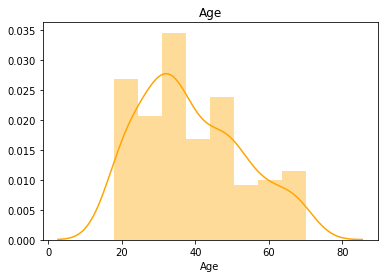

In [9]:
# Understanding the age distribution of this dataset

print(df['Age'].describe())

sns.distplot(df['Age'], color = 'orange')

plt.title('Age')
plt.show()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64


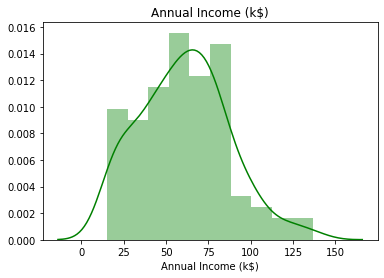

In [10]:
# Understanding the annual income distribution of this dataset

print(df['Annual Income (k$)'].describe())

sns.distplot(df['Annual Income (k$)'], color = 'green')

plt.title('Annual Income (k$)')
plt.show()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64


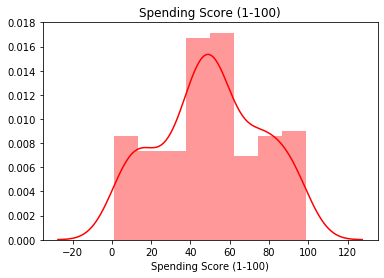

In [54]:
# Understanding the spending score distribution of this dataset

print(df['Spending Score (1-100)'].describe())

sns.distplot(df['Spending Score (1-100)'], color = 'red')

plt.title('Spending Score (1-100)')
plt.show()

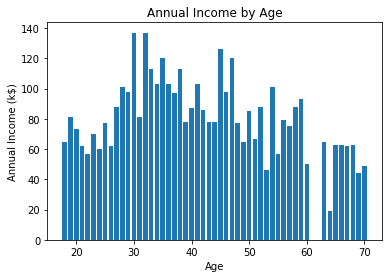

In [11]:
# Age in relationship to annual income

plt.bar(df['Age'], height=df['Annual Income (k$)'])

plt.ylabel('Annual Income (k$)')
plt.xlabel('Age')
plt.title("Annual Income by Age")

plt.show()

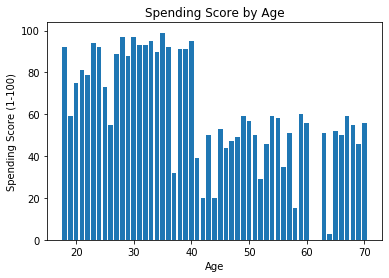

In [12]:
# Age in relationship to spending score

plt.bar(df['Age'], height=df['Spending Score (1-100)'])

plt.ylabel('Spending Score (1-100)')
plt.xlabel('Age')
plt.title("Spending Score by Age")

plt.show()

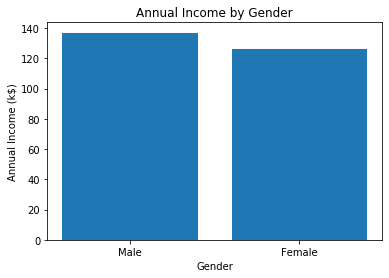

In [90]:
# Gender (Genre) in relationship to annual income

plt.bar(df['Genre'], height=df['Annual Income (k$)'])

plt.ylabel('Annual Income (k$)')
plt.xlabel('Gender')
plt.title("Annual Income by Gender")

plt.show()

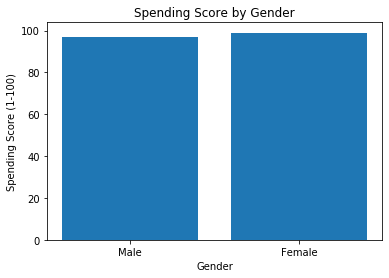

In [91]:
# Gender (Genre) in relationship to spending score

plt.bar(df['Genre'], height=df['Spending Score (1-100)'])

plt.ylabel('Spending Score (1-100)')
plt.xlabel('Gender')
plt.title("Spending Score by Gender")

plt.show()

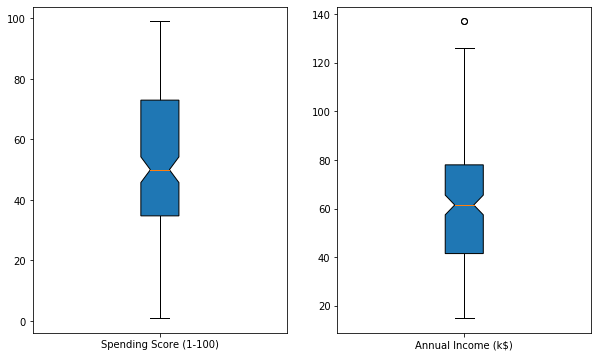

In [142]:
# Boxplots to compare spending score vs annual income

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.boxplot(df['Spending Score (1-100)'], notch='True', patch_artist=True, labels=['Spending Score (1-100)'])

plt.subplot(1,2,2)
plt.boxplot(df['Annual Income (k$)'], notch='True', patch_artist=True, labels=['Annual Income (k$)'])

plt.show()

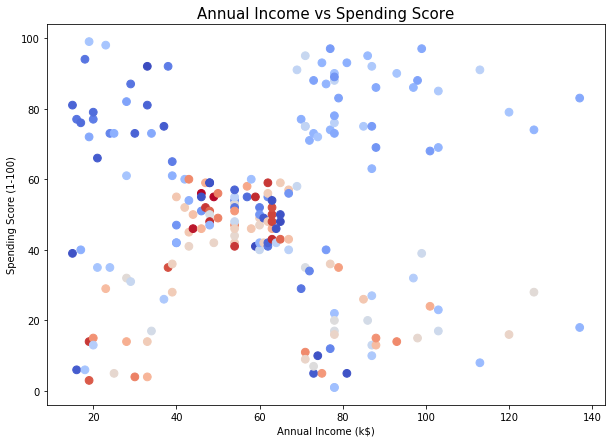

In [56]:
# scatter plot Annual Income vs Spending Score by age (heatmap style for age)

df.plot.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', c=df['Age'], 
                cmap='coolwarm', colorbar=False, figsize=(10,7), s=60)
plt.title('Annual Income vs Spending Score', fontsize=15)
plt.show()

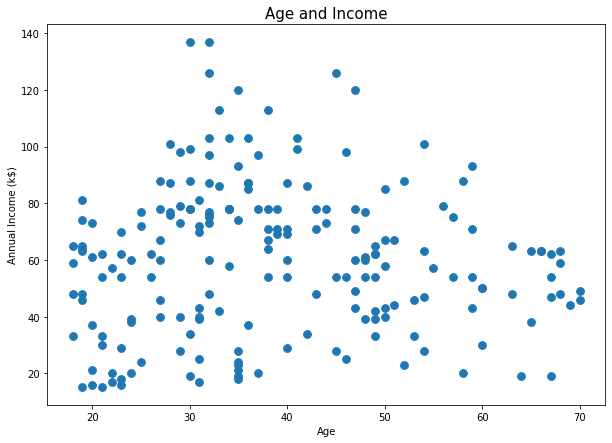

In [145]:
df.plot.scatter(x='Age', y='Annual Income (k$)', figsize=(10,7), s=60)

plt.title('Age and Income', fontsize=15)
plt.show()

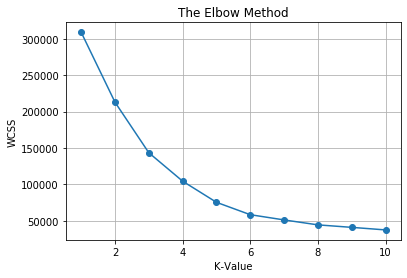

In [149]:
# Using WSCC (Within Custer Sum of Squares) to determine optimal number of clusters value (k-value)

from sklearn.cluster import KMeans

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df1.iloc[:,1:])
    wcss.append(kmeans.inertia_)

plt.grid()    
plt.plot(range(1,11),wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('K-Value')
plt.ylabel('WCSS')
plt.show()

In [150]:
# k means model - followed along with analyticsvidhya blog to help understand and complete this step.

# using clusters based off of the elbow method
new_info = KMeans(n_clusters=5)
# fitting with df1
new_info.fit(df1)
# predicting labels
y=new_info.predict(df1)
# adding labels
df1['label'] = y
# new df1
df1

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),label
0,1,19,15,39,0
1,2,21,15,81,4
2,3,20,16,6,0
3,4,23,16,77,4
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,2
196,197,45,126,28,1
197,198,32,126,74,2
198,199,32,137,18,1


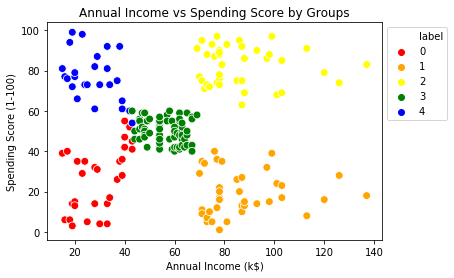

In [151]:
# scatter plot Annual Income vs Spending Score with new df1 data

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='label',
                 palette=['red', 'orange', 'yellow', 'green', 'blue'], s=60)
plt.title('Annual Income vs Spending Score by Groups', fontsize=12)
plt.legend(bbox_to_anchor = (1,1))
plt.show()